In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [140]:
dataset  = pd.read_csv('train.csv')


In [141]:
dataset .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [142]:
dataset.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [143]:
display("NULL Values", dataset.isnull().sum())


'NULL Values'

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64


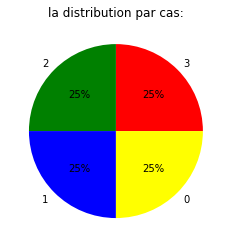

In [144]:
y=dataset.price_range
x=dataset.drop(["price_range"],axis=1)
print(y.value_counts())
plt.pie(y.value_counts(),labels=[3,2,1,0],colors=["red","green","blue","yellow"],autopct='%1.0f%%')
plt.title("la distribution par cas:")
plt.show()

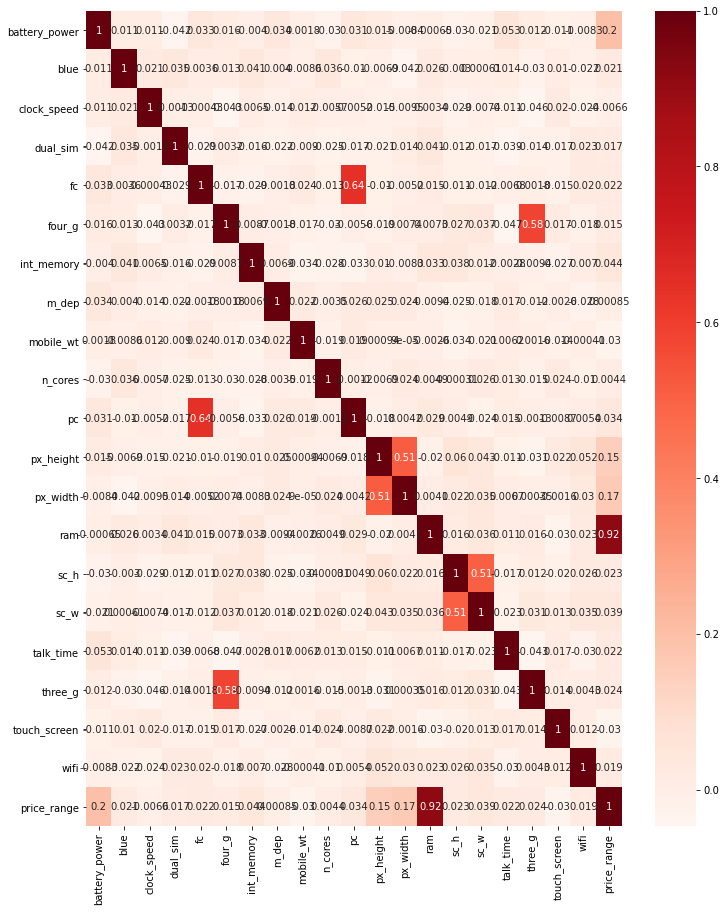

battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [146]:
#1. Filter Method
# filtrer les features avec la matrice de corrélation 
# on mesure la corrélation linéare avec deux variables
# on prend r>0.2
plt.figure(figsize=(12,15))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["price_range"])
#Selectionner les feautres les plus corréles
relevant_features = cor_target[cor_target>0.2]
relevant_features



In [147]:
y=dataset.price_range
x=dataset.drop(["price_range"],axis=1)
x_1 = sm.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,x_1).fit()
model.pvalues

cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.20):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'three_g', 'wifi']


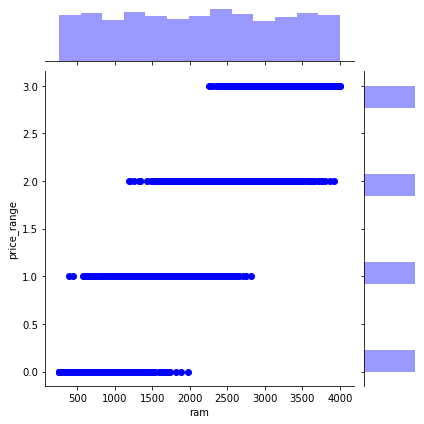

In [148]:

sns.jointplot(x='ram',y='price_range',data=dataset,color='blue',kind='scatter');

In [149]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

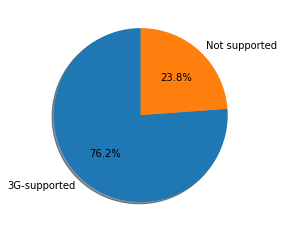

In [150]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

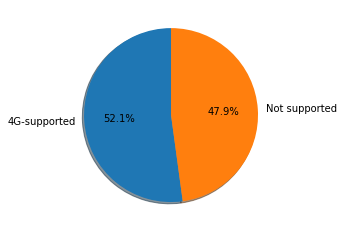

In [151]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

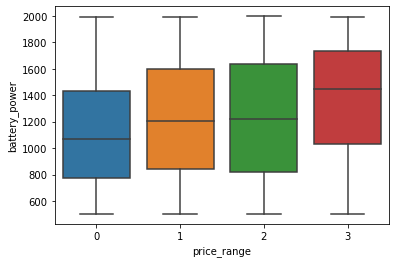

In [152]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)


Text(0.5, 0, 'MegaPixels')

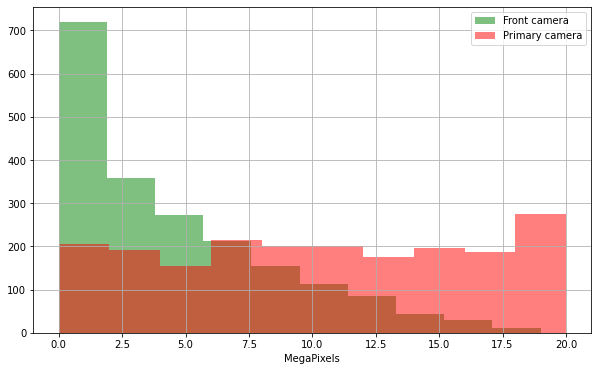

In [153]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='green',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

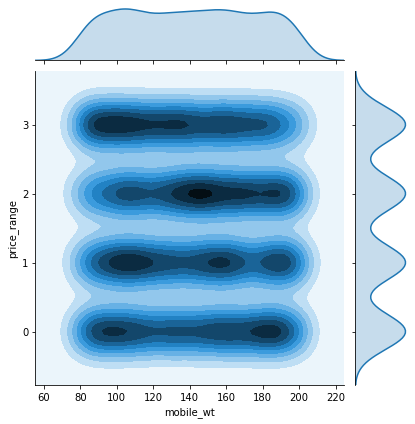

In [154]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

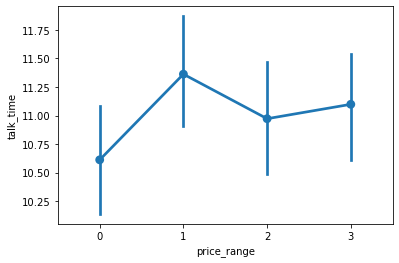

In [155]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)


In [185]:
X=dataset[selected_features_BE]
y=dataset['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)



0.906611983820081

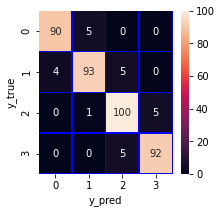

0.9375

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

y_pred_knn=knn.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_pred_knn,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
accuracy_score(y_true, y_pred_knn)

In [166]:
error_rate = []
for i in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

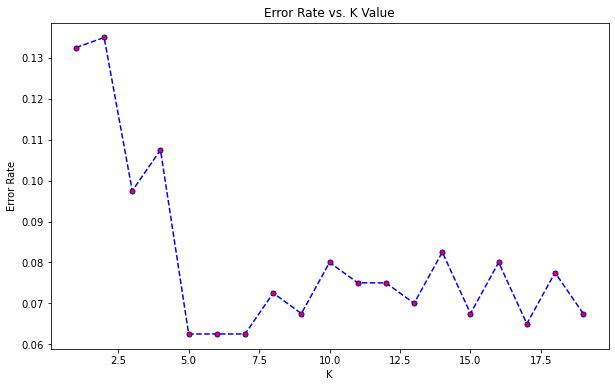

In [167]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [126]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logmodel.score(X_test,y_test)


C:\Users\Mehdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5875

In [ ]:
#Creating & Training Decision Tree Model¶


In [178]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=99)

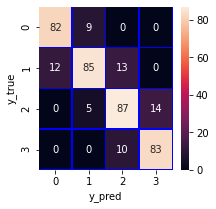

0.8425

In [182]:
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred_dtree=dtree.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_pred_dtree,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
accuracy_score(y_true, y_pred_dtree)

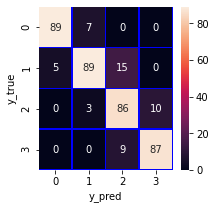

0.8775

In [183]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5000) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)
y_pred_rfc=rfc.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_pred_rfc,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
accuracy_score(y_true, y_pred_rfc)

>rfc -> 0.887 (0.016)--- dataset
>knn -> 0.934 (0.010)--- dataset
>stacking -> 0.933 (0.012)--- dataset


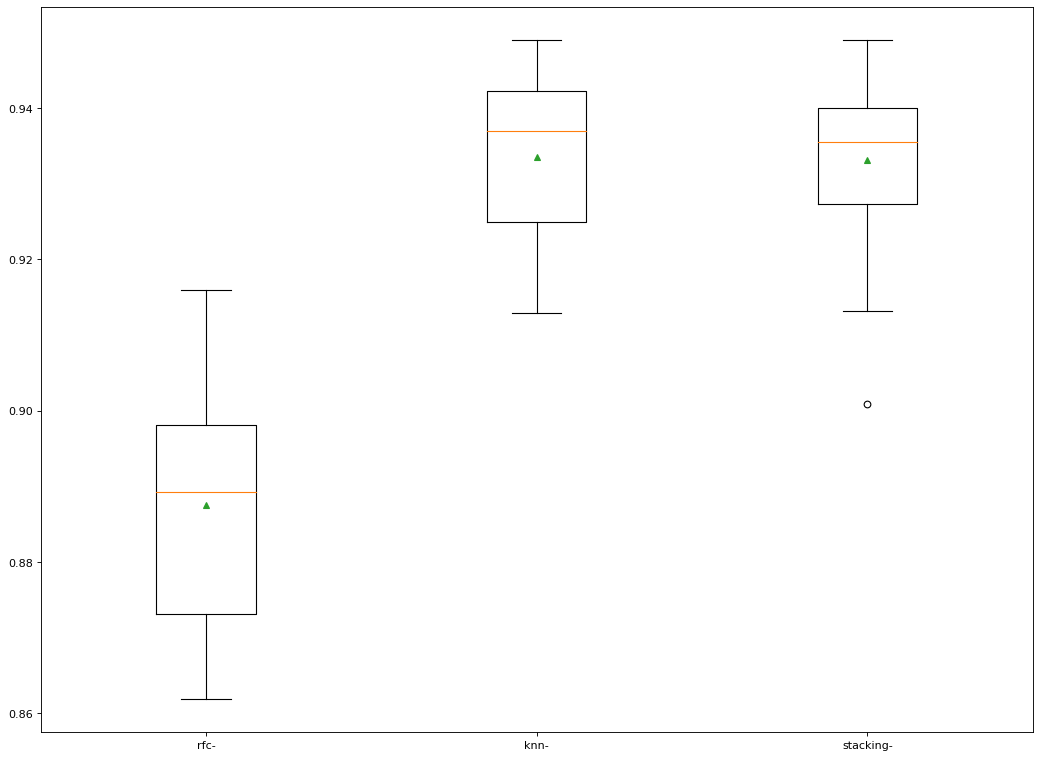

In [132]:



figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
 


# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('rfc',rfc ))
  level0.append(('knn', knn))
           
  # define meta learner model
  level1 = LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['rfc'] = rfc
  models['knn'] = knn
  models['stacking'] = get_stacking()

  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model,x,y):
  cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
  scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, results1 = list(), list(),list()
for name, model in models.items():
  scores= evaluate_model(model,x,y)
  results.append(scores)
  names.append(name)
  print('>%s -> %.3f (%.3f)--- dataset' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.rcParams["figure.figsize"] = (15,6)
pyplot.boxplot(results, labels=[s+"-" for s in names], showmeans=True)
pyplot.show()
pyplot.show()
